# Regression Project 1

### Regression with NumPy
In this project, We have to develop a regression model that best fits the data below.

All data sets are curated from the UCI Machine Learning repository.

- Airfoil Self-Noise: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise 
- Yacht Hydrodynamics: https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics
- Concrete Slump: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [1]:
# import Pyhton libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stat
from sklearn.model_selection import KFold
import random
import math


# Import warnings
import warnings 
warnings.filterwarnings('ignore')

## Reading data and storing in panda tables

In [2]:
# Airfoil Self-Noise data
af_df = pd.read_table(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",
    names = ["Frequency", "Angle of attack", "Chord length", "Free-stream velocity", 
             "Suction side displacement", "Scaled sound pressure"])

# Yacht Hydrodynamics
yh_df = pd.read_table(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data",
    names = ["Longitudinal buoyancy", "Prismatic coefficient", "Length-displacement", "Beam-draught", 
             "Length-beam", "Froude number", "Residuary resistance"], delim_whitespace = True)

# Concrete Slump
cs_df = pd.read_csv(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data",
    names = ["Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr.", "SLUMP", "FLOW",
             "Compressive Strength"], skiprows = 1)

## Now, reading first 5 rows of dataframes

In [3]:
af_df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement,Scaled sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
yh_df.head()

,Longitudinal buoyancy,Prismatic coefficient,Length-displacement,Beam-draught,Length-beam,Froude number,Residuary resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [5]:
cs_df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP,FLOW,Compressive Strength
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## Question 1 

1) Develop a function with the following first line:

def my_regression(trainX, testX, noutputs)

The input variables are:

- trainX - an [ntrain x (nfeature + noutputs)] array that contains the features in the first 'nfeature' columns and the outputs in the last 'noutput' columns
- testX - an [ntest x nfeature] array of test data for which the predictions are made
    noutputs - the number of output columns in trainX

The output should be an [ntest x noutputs] array, which contains the prediction values for the testX data. You can use these data to then calculate squared error by comparing against the testX outputs.

Your my_regression code should do some kind of cross-validation to determine the right model for the training data, e.g., linear vs. polynomial vs. radial basis functions (your choice). Then this model is applied to the test data to make a prediction.

Rules:

- Your code should not use any regression library, but can use NumPy as this will be useful for array handling.
    No other inputs to this function are allowed.
- You may not use the testX data to train your model. Notice that outputs are not passed in for testing data.
- Your code can perform data scaling (scaling features to the interval [0,1] or z-score scaling), can use any   basis functions you want, cross-validation on the training data, regularization, and model selection.


In [6]:
class ProcessMyData:
    """first of all, lets process the data by normalizing, 
    splitting into train and test, and cross-validate. I am performing all these data proceesing 
    on the pandas DataFrame
    
    Arguments:
        First step : Pandas dataframe that need to processed
    """
    
    def __init__(self):
        """Initialize class variable using 
        the self or class objects
        
        Arguments:
            None
        Returns:
             None, simply provide pass
        """
        pass
    
    def z_score_norm(self, data):
        """z-score is used to normalize data
        
        method used z-score normalization
        
        Arguments:
        Data to be normalized
            
        Returns:
            Normalized data in DataFrame
        """
        # Following formula uses mean and standrand deviation for the normalization
        norm_df = (data - data.mean()) / data.std()
        return pd.DataFrame(norm_df)
    
    def train_test_split(self, data, cut_at = 0.90):
        """ Splitting of data into train and test set
        
        pythons 'frac=cut_at' value splits the data into two parts as train 
        and test data. The cut_at value is a percentage of data in the training 
        set and rest in the test set

                
        Returns:
            train: Training set of the data at cut_at value 
            test: Testing set of the data
        """
        # train, test splitting
        train = data.sample(frac = cut_at, random_state = 200)
        test = data.drop(train.index)
        return train, test
    
    def pred_target_split(self, data, noutputs = 1):
        """ This function separates Predictors and output variables 
        in padas DataFrame
        
        dependent and indepent variables in the Dataframe are to be separated as 
        predictors and target assuming the target variable is in the last column.

         Arguments:
            data: Pandas Dataframe to be split into Predictors and target
            noutputs: Number of output variables in the dataset.
            
        Returns:
            predictors: Dependent variables 
            output: target variable (last column=-1)
        """
        # selecting predictors
        predictors = data.iloc[:, 0:-noutputs]
        # selecting target
        outputs = data.iloc[:, -noutputs:]
        return predictors, outputs
    
    def cross_val(self,data):
      
        """ Cross-validation 
        This function splits data into K number of groups 
     
        Arguments:
            data: K-fold cross validation on data
            k: Number of folds. we will be using 5- fold cross validation
            
        Returns:
            index: Row index for each data in the set of the folds
        """
        # Creating K-Fold cross validation index.
        kf = KFold(n_splits=5, random_state=None, shuffle=False)    ###nsplitts = 5
        nf =kf.split(data)
        return nf

### Now I am creating Regression class in which I will define Regression function


In [7]:
class Regression:
    """ This class will be used to perform regression algorithm on data
    
    I will call 'DataProcessing class to process the data before appling 
    regression. 
    
    Here, I will use two different kinds of basisfunctons: linear and Guassian
    on training and test data with different values of lamda to select best model 
    after k-fold cross validation which has least mean square error value.

    """
    
    # Creating the data Processing object for training data
    data_process = ProcessMyData()
    
    def __init__(self, k_fold = 5): 
        self.k_fold = k_fold
        self.lamda_values = [0,0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100]
        self.kernels = ["linear", "gaussian"]
        self.parameters_list = []
        self.n_points = 10          
        self.model_param = []
        
    def lmse(self, actual, pred):
        """ Find the Prediction LMSE
        
        LMSE -  Least Mean Square Error is the average squared difference 
        between the prediction and actual values. The inputs are actual and 
        predicted values that outputs the LMSE rounded off to two digits.
        
        Arguments:
            actual: Actual value from the dataset.
            pred: Predicted value for the data.
            
        Returns:
            Least Mean Square Error value
        """
        # compute Least Mean Square Error
        lmse = round(np.sum((actual - pred) ** 2) / len(actual), 2)
        return lmse

    def gauss_kernel(self, data, n_points = 10):    #should not be less than training data
        """ here we are using Gaussian basis function:
        
        data is passed over the n- guassian function which convert into n-features to n-feature vectors.

        
        Arguments:
            data: Data to be changed into gaussian form
            n_points: Number of gaussian kernels/functions/points to refine into
        
        Returns:
            gaussian: N feature vectors represetation of the input dataset.
        """
        # Setting sigma as no. of original features
        sigma = data.shape[1]
        # Setting the random seed and sampling the points from the data
        random.seed(100)
        points = random.sample(list(data.index), n_points)
        # Initialize the gaussian kernel feature vector
        gaussian = np.zeros((data.shape[0], n_points))
        col = 0
        # Iterate through the n_points to come up with n gaussian feauture vectors
        for point in points:
            gaussian[:, col] = np.exp(-np.linalg.norm(data - data.loc[point, :], 2, axis = 1) ** 2 
                                      / (2. * sigma ** 2))
            col += 1
        return gaussian
    
    def cv_fit(self, x_train, y_train, k_fold):
        """ select best model after cross validation
        
        Task is to select best kernel, best lamda, and best least mean square error.
        
        Arguments:
            x_train: Predictors of the Training set
            y_train: Output of the Training set
            k_fold: Number of fold for the cross validation
            
        Returns:
            model_param: A dictinoary consists of selected model weights, 
                lamda value, lmse value, and kernel functions
        """
        
        # Initialize variables 
        weights = np.zeros((x_train.shape[1],))
        best_weights = weights
        identity = np.identity(x_train.shape[1])
        best_lmse = float("inf")
        best_lamda = float('inf')
        best_kernel = ""
                
        # Looping through the basis function
        for kernel in self.kernels:
            # Check the Gaussian function
            if kernel is "gaussian":
                x_train = self.gauss_kernel(pd.DataFrame(x_train), self.n_points)
                identity = np.identity(x_train.shape[1])
            # Looping through given values of Lamdas
            for lamda in self.lamda_values:
                lmse = 0
                for train_index, test_index in self.data_process.cross_val(data=x_train):
                    # train test spilliting and getting their indeces
                    x_train_index = x_train[train_index]
                    y_train_index = y_train[train_index]
                    x_test_index = x_train[test_index]
                    y_test_index = y_train[test_index]
                    # find the solution for each lambda
                    inverse = np.linalg.inv(lamda*identity + np.dot(x_train_index.T, x_train_index))
                    data_term = np.dot(x_train_index.T, y_train_index)
                    weights = np.dot(inverse, data_term)
                    # Predict with the test set
                    prediction = np.dot(x_test_index, weights)
                    # defining least meansquare errors
                    lmse += (np.sum((y_test_index - prediction) ** 2) / len(y_test_index))
                # lmse for each lamda
                lmse = lmse / k_fold
                # Preparing the parameter list for further analysis
                # Storing the result in class variable
                parameters = {'basis_function': kernel, 
                              'lamda': lamda,
                              'lmse': lmse,
                              'weights': weights}
                self.parameters_list.append(parameters)
                # Updating and appending the best parameters selected by model
                if best_lmse > lmse:
                    best_lmse = lmse
                    best_lamda = lamda
                    best_weights = weights
                    best_kernel = kernel 
        model_param = {"weights": best_weights, "kernel": best_kernel, "lamda": best_lamda, "lmse": best_lmse}
        self.model_param.append(model_param)
        return model_param

    def my_regression(self, trainX, testX, noutputs):
        """ 
        This is my main function to make prediction:
        continuous output(s)
        
        this function takes data( training set) and performs cross validation
        and selects best parameters, lambda, basis function and uses test data 
        for the predictions

        Arguments:
            trainX - an [ntrain x (nfeature + noutputs)] array that contains
                the features in the first 'nfeature' columns and the outputs 
                in the last 'noutput' columns
            testX - an [ntest x nfeature] array of test data for which the 
                predictions are made
            noutputs - the number of output columns in trainX
            
        Returns:
            prediction: [ntest x noutputs] array, which contains the prediction 
                values for the testX data
        """        
        #  Z-score  normalization of training and test data
        trainX.iloc[:, 0:-noutputs] = self.data_process.z_score_norm(trainX.iloc[:, 0:-noutputs])
        testX = self.data_process.z_score_norm(testX)        
        # Splitting og traindata
        x_train, y_train = self.data_process.pred_target_split(trainX, noutputs = noutputs)              
        # introduce the bias term in the feature vector 
        x_train["bias"] = 1
        testX["bias"] = 1
        # Convert Dataframe to Numpy array
        x_train = x_train.values
        y_train = y_train.values 
        # Intializing the prediction array with zeros
        prediction = np.zeros((testX.shape[0], noutputs)) 
        # fitiing the model
        model = self.cv_fit(x_train, y_train, self.k_fold)
        # kernel selection iff statement
        if model["kernel"] is "gaussian":
            # Redefine in gaussian feature
            gaus = self.gauss_kernel(pd.DataFrame(np.concatenate((x_train, testX.values))),
                                                self.n_points)
            x_train_gaus = gaus[0:len(x_train), :]  
            x_test_gaus = gaus[len(x_train):, :]
            # Initialize the identity matrix for the equation
            identity = np.identity(x_train_gaus.shape[1])
            # using training data to train the model
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train_gaus.T, x_train_gaus))
            data_term = np.dot(x_train_gaus.T, y_train)
            weights = np.dot(inverse, data_term)
            # prediction using test data
            prediction = np.dot(x_test_gaus, weights)
        else:
            # Initialize the identity matrix for the equation
            identity = np.identity(x_train.shape[1])
            # Using training data to train the model
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train.T, x_train))
            data_term = np.dot(x_train.T, y_train)
            weights = np.dot(inverse, data_term)
            # prediction with test data
            prediction = np.dot(testX.values, weights)
        return prediction

### Above, we had our main two classes that contains the function needed for calculating the regression using numpy packages. Let's use those find the prediction for each dataset one by one.

# Answer problem 3
# In this part, we fit the train and test data to the model and compute mean square error:


## Airfoil Dataset

In [8]:
af_regressor = Regression()
af_data_process = ProcessMyData()
af_df_train, af_df_test = af_data_process.train_test_split(af_df)
prediction = af_regressor.my_regression(af_df_train, af_df_test.iloc[:, 0:-1], 1)
prediction.reshape(len(prediction), )

array([127.38036158, 124.96862544, 123.82925624, 126.441137  ,
       118.29693806, 124.01201993, 123.31394574, 126.40474422,
       120.05607273, 117.90367729, 122.446263  , 115.58186675,
       125.77966593, 121.70756646, 122.46146246, 120.28579789,
       119.52955084, 129.63692885, 129.2297189 , 128.7643361 ,
       127.42636056, 126.43742212, 127.22460574, 127.25542053,
       127.05763284, 129.59025257, 128.71765983, 126.58216195,
       124.72063077, 123.38265523, 119.71776571, 117.57477464,
       105.94020472, 127.06832933, 122.99622986, 123.14675706,
       124.95297585, 127.77724495, 127.57945726, 127.34676586,
       123.85639488, 124.16022542, 125.99069294, 125.05992735,
       124.92811838, 124.13115034, 116.87711445, 130.21019628,
       128.05780084, 119.33187341, 123.03100694, 127.67115591,
       131.73671934, 128.01365696, 128.96520857, 117.91236715,
       127.68483125, 128.85355503, 120.47666469, 121.54319529,
       118.46740166, 125.8912421 , 126.32114714, 125.39

Above are the prediction values for the airfoil dataset using the selected model on the test set.


In [9]:
af_regressor.model_param

[{'weights': array([[ -3.93108054],
         [ -2.43710297],
         [ -3.40901061],
         [  1.51820789],
         [ -2.03213135],
         [124.97664959]]),
  'kernel': 'linear',
  'lamda': 0,
  'lmse': 23.52880440873517}]


these are parameters used for the model using the model param variable of the regressor class object.

Thus, after 5-fold cross validation and model selection on airfoil dataset, we got the following parameters and values:

Kernel : Linear, Lamda value : 0, Least Mean Square Error value: ~23.53

In [10]:
lmse = af_regressor.lmse(af_df_test.iloc[:, -1].values.reshape(len(af_df_test), 1), prediction)
print(lmse)

22.62


Which is the Least Square Error on the test set using Linear bsis function 



## Yachat Hydro Dataset

In [11]:
yh_regressor = Regression()
yh_data_process = ProcessMyData()
yh_df_train, yh_df_test = yh_data_process.train_test_split(yh_df)
prediction = yh_regressor.my_regression(yh_df_train, yh_df_test.iloc[:, 0:-1], 1)
prediction.reshape(len(prediction))

array([-4.76064772, 14.83740013,  2.56878054, -1.66703653, 20.57809108,
       18.19355312, -8.03261645,  6.60016234, 15.22327955, -2.28550914,
        0.38482661,  6.85874629, 45.57233175, -0.25510184,  6.9014568 ,
        0.26016558,  2.50375125,  6.2226378 ,  8.63476198, 18.39916195,
       -7.9001485 ,  3.43522877, 11.30709786, 33.45558517, 11.14623578,
       27.51530965, 42.55932638,  2.19005236, 16.74122166, -0.39066549,
       35.60489132])

In [12]:
yh_regressor.model_param

[{'weights': array([[-4450.43210582],
         [  291.63731932],
         [  278.2486656 ],
         [-6503.23322521],
         [ 1472.90486099],
         [ 5744.21387913],
         [ 3174.18007623],
         [  155.826119  ],
         [  100.46034331],
         [  -54.9160325 ]]),
  'kernel': 'gaussian',
  'lamda': 0,
  'lmse': 69.38978535549354}]

Thus, after 5-fold cross validation and model selection on Yachat Hydro dataset, we got the following parameters and values:

Kernel : Guassian, Lamda value : 0, Least Mean Square Error value: ~69.39

In [13]:
lmse = yh_regressor.lmse(yh_df_test.iloc[:, -1].values.reshape(len(yh_df_test), 1), prediction)
print(round(lmse, 2))

65.72


Which is the Least Square Error on the test set using Guassian basis function.


## concrete_slump

In [14]:
cs_regressor = Regression()
cs_data_process = ProcessMyData()
cs_df_train, cs_df_test = cs_data_process.train_test_split(cs_df)
prediction = cs_regressor.my_regression(cs_df_train, cs_df_test.iloc[:, 0:-3], 3)
prediction

array([[10.84145082, 29.46887886, 39.60993182],
       [23.76156758, 63.0910487 , 33.47679517],
       [20.30244518, 62.01817462, 43.03426264],
       [14.34046326, 48.1791982 , 37.89242711],
       [25.02701376, 61.99076048, 15.12328452],
       [21.9979371 , 62.0532411 , 45.79140882],
       [19.73383869, 49.02034691, 38.15884348],
       [21.07216389, 51.74733482, 32.9473331 ],
       [ 8.76262918, 26.92591148, 42.01170465],
       [16.70258562, 51.22764592, 39.48699892]])

In [15]:
cs_regressor.model_param

[{'weights': array([[-3.14231788e+03, -7.15007386e+03,  2.35835896e+03],
         [-4.48973236e+02, -8.82282785e+02,  3.02057810e+02],
         [-2.16084648e+03, -4.65681595e+03,  1.86788103e+03],
         [-2.70389695e+02, -6.47593437e+02, -1.06587181e+02],
         [ 3.18512739e+03,  7.01240220e+03, -2.45327773e+03],
         [-1.25887947e+01, -1.28300303e+02,  2.81716488e+02],
         [ 2.52789790e+03,  5.82875797e+03, -1.65274867e+03],
         [-1.39649038e+01, -7.17956468e+01, -4.97809033e+02],
         [-2.86226553e+01,  1.98747914e+00, -3.04354173e+01],
         [ 3.42654295e+02,  6.45876045e+02,  2.53512695e+00]]),
  'kernel': 'gaussian',
  'lamda': 0,
  'lmse': 203.65777859520887}]

The lmse after 5-fold cross-validation is :

- Kernel : gaussian
- Lamda value : 0
- Least Mean Square Error value: ~203.66
In this dataset, the Least mean square error is calculated as a average over all the three outputs while during the model selection


In [16]:
lmse_list = []
for i in range(0, 3):
    lmse = cs_regressor.lmse(cs_df_test.iloc[:, -3 + i].values.reshape(len(cs_df_test), ), 
                          prediction[:, i].reshape(len(prediction), ))
    lmse_list.append(round(lmse, 2))

print("Lmse:")
print("Slump:", lmse_list[0])
print("Flow:", lmse_list[1])
print("Compressive Strength:", lmse_list[2])

Lmse:
Slump: 67.83
Flow: 381.91
Compressive Strength: 21.16


Which are the Least Square Error on the test set using Guassian basis function for three outputs.


#### Are the results reasonable? Do you get squared errors that are close to mine? (I'll release linear basis function squared errors)


 The least mean square error we obtained for three different set makes sense. Lets compare these values using scikit learn. 
 The errors calculatded by our model are not exactly same as the errors you provided  but they are close.

In [17]:
# import linear model and mean square error 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# create a function using sklearn methods
def sklearn_regression(trainX, testX, noutputs = 1):
    # Creating linear regression object
    regr = linear_model.LinearRegression()
    
    # Creating DataProcessing class object 
    data_process = ProcessMyData()
    
    x_train, y_train = data_process.pred_target_split(trainX, noutputs = noutputs)

    # fit train data to the model
    regr.fit(x_train, y_train)

    # predicting using test data
    pred = regr.predict(testX.iloc[:, 0:-noutputs].values)

    print("Mean squared error: %.2f"
          % mean_squared_error(testX.iloc[:, -noutputs].values, pred))

## Airfol dataset

In [18]:
af_df_train, af_df_test = af_data_process.train_test_split(af_df)
sklearn_regression(af_df_train, af_df_test)

Mean squared error: 22.58


Which is very close to 22.62 that we obtained using regression function.

## Yachat hydro dataset

In [19]:
yh_df_train, yacht_hydro_df_test = yh_data_process.train_test_split(yh_df)
sklearn_regression(yh_df_train, yh_df_test)

Mean squared error: 80.77


we obtained 65.72 using our model. This is not in very good agrrement with the value obtained using scikit-learn. our model gives less value of least square error. In our model we trained 90% data and used 10% data for validation.


## Concrete slump dataset

In [20]:
cs_df_train, cs_df_test = cs_data_process.train_test_split(cs_df)

# Creating regression object
regr = linear_model.LinearRegression()

x_train, y_train = cs_data_process.pred_target_split(cs_df_train, noutputs = 3)

for i in range(0, 3):
    # fitting training data
    regr.fit(x_train, y_train.iloc[:, i])

    # make prediction
    pred = regr.predict(cs_df_test.iloc[:, 0:-3].values)

    print("Mean squared error: %.3f"
          % mean_squared_error(cs_df_test.iloc[:, i-3].values, pred))

Mean squared error: 58.367
Mean squared error: 254.353
Mean squared error: 5.939


Our model gave Lmse:
Slump: 67.83
Flow: 381.91
Compressive Strength: 21.16. This shows our model is doing good prediction as well. 

##  Can you do better than linear basis function prediction?

Yes of course, in our case guassian basis function is doing better prediction than linear basis function. As we increase n-points(  Number of gaussian kernels/functions/points) in our algoritm, model learns better. Further, if we provide many n-points, the algorithm over fit the data and bias will increase. So, after training our model, we need to see how it is performing on the test data.

In many problems, such a linear relationship may not hold.
Polynomial regression is the most traditional way to extend the linear model. As we increase the degree of polynomial, a polynomial regression allows us to produce very non-linear curves while still estimating the coefficients using least squares. Further, Polynomials are global basis functions,each afecting the prediction over the whole input space.Often,local basis functions are more appropriate.One possibility is to use functions proportionalto Gaussian probability densities, which is Guassian basis function. We have used linear and Guassian basis function in our model.

## Question 2

2) Test your regression on a simple one-dimensional data set, where your training data is generated by the following function:


In [21]:
x = np.arange(-5,5,0.1)
y = (np.cos(x**2))+ 0.1*x**3


### Creating DataFrame

In [22]:
d = {'X': x, 'Y': y}
df = pd.DataFrame(d, columns = ['X', 'Y'])
df.head(3)

,X,Y
0,-5.0,-11.508797
1,-4.9,-11.331687
2,-4.8,-11.557767


### Problem 2(a)
Plot y versus x (y on vertical axis, x on horizontal axis) as a line with noise variance = 0. This is the truth that you wish your regression model to fit to. Plot from x = -5 to +5 at increments of 0.1.

Fitting best kernel with best vlaue of lamda to the data

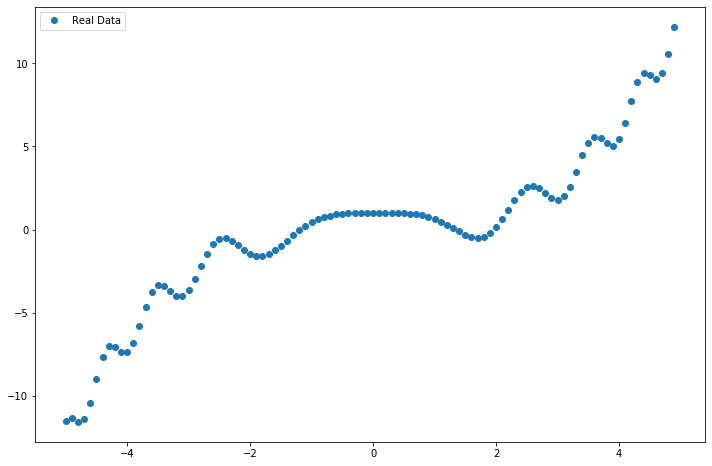

In [23]:
plt.figure(figsize=(12,8))
plt.plot(x,y,'o', label ='Real Data')
plt.legend()

The weitht values, best kernel, best lambda and mean sqare error obtained after using regression function are:

## Using Regression function to the data in Problem (2)

In [24]:
q2_regressor = Regression()
q2_data_process = ProcessMyData()
q2_df_train, q2_df_test = q2_data_process.train_test_split(df)
pprediction = q2_regressor.my_regression(q2_df_train, df.iloc[:, 0:-1], 1)
#pprediction

In [25]:
q2_regressor.model_param

[{'weights': array([[ 101.03000965],
         [-249.40583371],
         [ 146.80810813],
         [ 251.2069828 ],
         [  10.75689526],
         [-241.64503047],
         [-169.18122209],
         [  26.52994727],
         [ 209.12040737],
         [ -86.89985924]]),
  'kernel': 'gaussian',
  'lamda': 0.0001,
  'lmse': 0.6084960100564676}]

Thus, after applying regression function to the data, for the best prediction Regression function takes guassian kernel for lambda = 0.0001 with mean square error 0.608.

# Defining Error 

In [26]:
def Error(sig, x):
    ee= np.random.normal(0, sig, len(x))
    return ee

# Error for different standard deviations 

In [27]:
ee1=  Error(0.1, x)
ee2=  Error(0.2, x)
ee3=  Error(0.5, x)
ee4=  Error(1, x)

## Problem 2(b)

Plot y versus x for standard deviations  σ = 0.1 , 0.2 , 0.5 , 1 . Each line should be a different color. Make sure your plots are labeled with a legend. You will now use your regression function to see how close you can come to the truth in part a) based on noisy measurements.

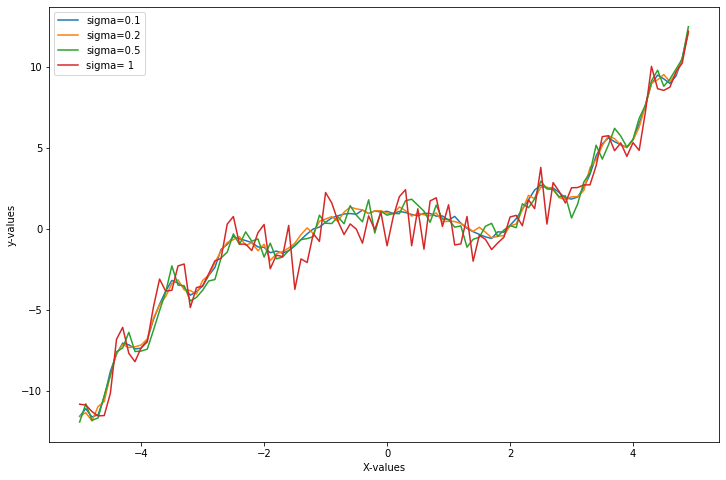

In [28]:
plt.figure(figsize=(12,8))
plt.plot(x,y+ee1,label= 'sigma=0.1')
plt.plot(x,y+ee2,label= 'sigma=0.2' )
plt.plot(x,y+ee3, label= 'sigma=0.5')
plt.plot(x,y+ee4, label= 'sigma= 1')
plt.xlabel('X-values'), plt.ylabel('y-values')
plt.legend()

## Problem 2(c)

Now you will run an experiment where you will see how close your regression is to the truth based on the variance of the noise and the number of training data. Make a table that has number of training data [2,5,10,20,50,100,200,500] in the rows and the standard deviations from part b) in the column. Run 5-fold cross validation on each of these 32 combinations of parameters and report the cross-validation squared error.

In [29]:
xx = np.arange(-5,5,0.01)
yy = (np.cos(xx**2))+ 0.1*xx**3
len(xx)

1000

## we need to increase data points inorder to select upto 500 trianing_data to fit the model, that's why we created 1000 data points

In [30]:
ee1=  Error(0.1, xx)
ee2=  Error(0.2, xx)
ee3=  Error(0.5, xx)
ee4=  Error(1, xx)

In [31]:
d1 = {'X': xx, 'Y': yy+ee1}
d2 = {'X': xx, 'Y': yy+ee2}
d3 = {'X': xx, 'Y': yy+ee3}
d4 = {'X': xx, 'Y': yy+ee4}


df1 = pd.DataFrame(d1, columns = ['X', 'Y'])
df2 = pd.DataFrame(d2, columns = ['X', 'Y'])
df3 = pd.DataFrame(d3, columns = ['X', 'Y'])
df4 = pd.DataFrame(d4, columns = ['X', 'Y'])

 ####  For just 2 training data, I cant not do 5-fold cross validation using my regression function.
 
 ## Error Table [Answer 2(b)]

Next, my regression function makes best choices between linear and guassian kernel depending upon the other parameters like training, test data volume and n_points: Number of gaussian kernels/functions/points to refine into. So, depending upon the given parameters, I had to update my function too. So, here I am making a table for cross-validation squared error for 32 combinations after running 5-fold cross validation on each of these 32 combinations of parameters. 

I used lambda = 0.001, and n_points = 5 for only 5 row training data and n_points = 10 for rest of all.



In [32]:
class Pmyd:

    def __init__(self):

        pass
    
    def z_score_norm(self, data):

        # Following formula uses mean and standrand deviation for the normalization
        norm_df = (data - data.mean()) / data.std()
        return pd.DataFrame(norm_df)
    
    def train_test_split(self, data, cut_at = 0.05):

        # train, test splitting
        train = data.sample(frac = cut_at, random_state = 200)
        test = data.drop(train.index)
        return train, test
    
    def pred_target_split(self, data, noutputs = 1):

        # selecting predictors
        predictors = data.iloc[:, 0:-noutputs]
        # selecting target
        outputs = data.iloc[:, -noutputs:]
        return predictors, outputs
    
    def cross_val(self,data):

        # Creating K-Fold cross validation index.
        kf = KFold(n_splits=5, random_state=None, shuffle=False)   
        nf =kf.split(data)
        return nf


class Mod_Regression:
 
    
    # Creating the data Processing object for training data
    data_process = Pmyd()
    
    def __init__(self, k_fold = 5):           
        self.k_fold = k_fold
        self.lamda_values = [0.001]
        self.kernels = ["linear", "gaussian"]
        self.parameters_list = []
        self.n_points = 10                 
        self.model_param = []
        
    def lmse(self, actual, pred):

        # Computing the LMSE and rounding of to two digits
        lmse = round(np.sum((actual - pred) ** 2) / len(actual), 2)
        return lmse

    def gauss_kernel(self, data, n_points = 10):   

        # Set the sigma value to be no. of original features
        sigma = data.shape[1]
        # Setting the random seed and sampling the points from the data
        random.seed(100)
        points = random.sample(list(data.index), n_points)
        # Initialize the gaussian kernel feature vector
        gaussian = np.zeros((data.shape[0], n_points))
        col = 0
        # Iterate through the n points to come up with n gaussian feauture vectors
        for point in points:
            gaussian[:, col] = np.exp(-np.linalg.norm(data - data.loc[point, :], 2, axis = 1) ** 2 
                                      / (2. * sigma ** 2))
            col += 1
        return gaussian
    
    def cv_fit(self, x_train, y_train, k_fold):

        # Initialize variables 
        weights = np.zeros((x_train.shape[1],))
        best_weights = weights
        identity = np.identity(x_train.shape[1])
        best_lmse = float("inf")
        best_lamda = 0.
        best_kernel = ""
                
        # Looping through the basis function (linear and Guassian)
        for kernel in self.kernels:
            # Chacking the Gaussian function
            if kernel is "gaussian":
                x_train = self.gauss_kernel(pd.DataFrame(x_train), self.n_points)
                identity = np.identity(x_train.shape[1])
            # Looping through Lamda
            for lamda in self.lamda_values:
                lmse = 0
                for train_index, test_index in self.data_process.cross_val(data=x_train):
                    # Split up the train and test for each iteration
                    x_train_index = x_train[train_index]
                    y_train_index = y_train[train_index]
                    x_test_index = x_train[test_index]
                    y_test_index = y_train[test_index]
                    # Closed form solution for each lamda values
                    inverse = np.linalg.inv(lamda*identity + np.dot(x_train_index.T, x_train_index))
                    data_term = np.dot(x_train_index.T, y_train_index)
                    weights = np.dot(inverse, data_term)
                    # Predict with the test set
                    prediction = np.dot(x_test_index, weights)
                    # Find the LMSE value for the set
                    lmse += (np.sum((y_test_index - prediction) ** 2) / len(y_test_index))
                # LMSE for each lamda
                lmse = lmse / k_fold
                # Preparing the parameter list for further analysis
                # Storing the result in class variable
                parameters = {'basis_function': kernel, 
                              'lamda': lamda,
                              'lmse': lmse,
                              'weights': weights}
                self.parameters_list.append(parameters)
                # Update the best parameters
                if best_lmse > lmse:
                    best_lmse = lmse
                    best_lamda = lamda
                    best_weights = weights
                    best_kernel = kernel 
        model_param = {"weights": best_weights, "kernel": best_kernel, "lamda": best_lamda, "lmse": best_lmse}
        self.model_param.append(model_param)
        return model_param

    def my_regression(self, trainX, testX, noutputs):

        # Normalize the train and test data
        trainX.iloc[:, 0:-noutputs] = self.data_process.z_score_norm(trainX.iloc[:, 0:-noutputs])
        testX = self.data_process.z_score_norm(testX)        
        # Split the train data into predictors and target variables
        x_train, y_train = self.data_process.pred_target_split(trainX, noutputs = noutputs)              
        # Include the bias term in the feature vector at the last
        x_train["bias"] = 1
        testX["bias"] = 1
        # Convert Dataframe to Numpy array
        x_train = x_train.values
        y_train = y_train.values 
        # Intializing the prediction array with zeros
        prediction = np.zeros((testX.shape[0], noutputs)) 
        # Get the best fit for the data with cross validation
        model = self.cv_fit(x_train, y_train, self.k_fold)
        # Check if the kernel is gaussian
        if model["kernel"] is "gaussian":
            # Redefine in gaussian feature
            gaus = self.gauss_kernel(pd.DataFrame(np.concatenate((x_train, testX.values))),
                                                self.n_points)
            x_train_gaus = gaus[0:len(x_train), :]  
            x_test_gaus = gaus[len(x_train):, :]
            # Initialize the identity matrix
            identity = np.identity(x_train_gaus.shape[1])
            # Train training data
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train_gaus.T, x_train_gaus))
            data_term = np.dot(x_train_gaus.T, y_train)
            weights = np.dot(inverse, data_term)
            # Predict with the test data
            # Inverse/rescale for the z-score norm
            prediction = np.dot(x_test_gaus, weights)
        else:
            # Initialize the identity matrix
            identity = np.identity(x_train.shape[1])
            # Train with the whole training data
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train.T, x_train))
            data_term = np.dot(x_train.T, y_train)
            weights = np.dot(inverse, data_term)
            # Predict with the test data
            # Inverse/rescale for the z-score norm
            prediction = np.dot(testX.values, weights)
        return prediction

In [33]:
s = {'Test data':[2,5,10,20,50,100,200,500], 
     'sigma =0.1':['No 5 fold',5.5229441,2.475284902,1.975331744,6.1312529677,5.30660157, 3.7889859773,0.814238838],
    'sigma = 0.2':['No 5 fold',6.06637654,2.818687360,1.8272834076,6.2636102986,5.448761678,3.814685644458,0.8494559328 ],
    'sigma = 0.5':['No 5 fold',7.17134639,4.173663084965,2.5051651505,6.3403927871,5.695264531,3.9997995518,1.028177343],
    'sigma = 1': ['No 5 fold',5.79721231,3.603492799005,3.43393217857,6.9788310931,6.0200290914,4.986896014,1.8016197546],
    'Kernel': ['NA', 'Linear','Linear','Linear','Linear','Guassian','Guassian','Guassian']}

In [34]:
pd.DataFrame(data=s)

,Test data,sigma =0.1,sigma = 0.2,sigma = 0.5,sigma = 1,Kernel
0,2,No 5 fold,No 5 fold,No 5 fold,No 5 fold,NA
1,5,5.52294,6.06638,7.17135,5.79721,Linear
2,10,2.47528,2.81869,4.17366,3.60349,Linear
3,20,1.97533,1.82728,2.50517,3.43393,Linear
4,50,6.13125,6.26361,6.34039,6.97883,Linear
5,100,5.3066,5.44876,5.69526,6.02003,Guassian
6,200,3.78899,3.81469,3.9998,4.9869,Guassian
7,500,0.814239,0.849456,1.02818,1.80162,Guassian


Thus, Lowest error is obtained for 500 training data with Gaussian kernel with sigma = 0.1.
Highest error is obtained for 50 training data with  Linear kernel with sigma =1. Our model selects best kernel (Linear or Guassian) which has least value of mean square error. 

## Problem 2(c)
#### Select the two best results (lowest error) and two worst results (highest error) from part c) and make four plots. Each plot should show the truth line you plotted in part a) and the learned regression model. Plot from x = -5 to 5 at increments of 0.1. What do you notice about these results?

## Solution

#### Lowest error is obtained for 500 training data with Gaussian kernel.
#### Highest error is obtained for 50 training data with  Linear kernel
To solve this problem, it is required to change some parameters: like train_test split ( for different training data numbers [2,5,10, 20, 50,100,200,500], n_ points (number of kernels), which should not be less than training data, so rewriting the above Regression function to fit into new criteria.

## For plotting, I am updating regression function as we are asked to choose different training data

## Making prediction and calculataing errors

In [35]:
q21_regressor = Mod_Regression()
q21_data_process = Pmyd()
q21_df_train, q21_df_test = q21_data_process.train_test_split(df1)
prediction1 = q21_regressor.my_regression(q21_df_train, df1.iloc[:, 0:-1], 1)


q21_regressor.model_param

[{'weights': array([[ 3.62407622],
         [-0.29552286]]),
  'kernel': 'linear',
  'lamda': 0.001,
  'lmse': 6.295464666190499}]

In [36]:
q22_regressor = Mod_Regression()
q22_data_process = Pmyd()
q22_df_train, q22_df_test = q22_data_process.train_test_split(df2)
prediction2 = q22_regressor.my_regression(q22_df_train, df.iloc[:, 0:-1], 1)

In [37]:
q22_regressor.model_param

[{'weights': array([[ 3.68780221],
         [-0.36902905]]),
  'kernel': 'linear',
  'lamda': 0.001,
  'lmse': 5.88365705379149}]

In [38]:
q23_regressor = Mod_Regression()
q23_data_process = Pmyd()
q23_df_train, q23_df_test = q23_data_process.train_test_split(df3)
prediction3 = q23_regressor.my_regression(q23_df_train, df.iloc[:, 0:-1], 1)

In [39]:
q23_regressor.model_param

[{'weights': array([[ 3.56783007],
         [-0.21513237]]),
  'kernel': 'linear',
  'lamda': 0.001,
  'lmse': 6.340337231638774}]

In [40]:
q24_regressor = Mod_Regression()
q24_data_process = Pmyd()
q24_df_train, q24_df_test = q24_data_process.train_test_split(df4)
prediction4 = q24_regressor.my_regression(q24_df_train, q24_df_test.iloc[:, 0:-1], 1)

In [41]:
q24_regressor.model_param

[{'weights': array([[ 3.4793451 ],
         [-0.25658533]]),
  'kernel': 'linear',
  'lamda': 0.001,
  'lmse': 6.21740339140465}]

## Plotting high and low errors

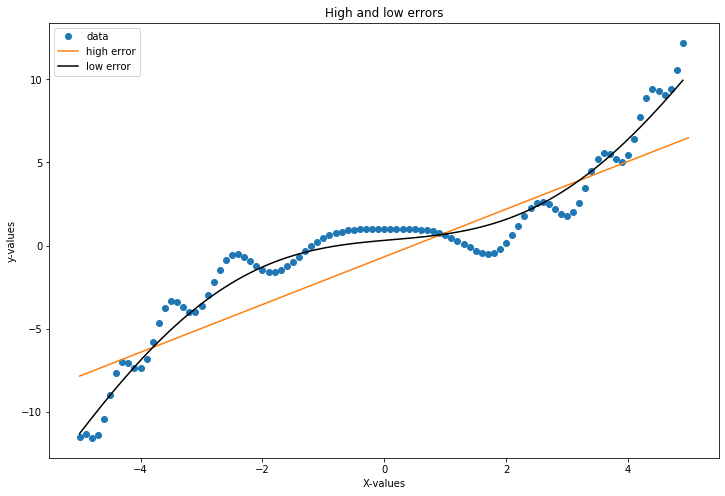

In [42]:
plt.figure(figsize=(12,8))
plt.plot(x, y,'o',label= 'data')
plt.plot(xx, prediction1,label= 'high error')
plt.plot(x, pprediction,label ='low error',color ='k')
plt.xlabel('X-values')
plt.ylabel('y-values')
plt.title('High and low errors')
plt.legend()

# Answer of question 3 is already discussed in problem 1